# Data Exploration
In this section, the data from 'Data_Acquisition' that was scrapped over the past few days is merged together. Then, the data is explored via plots to gain insights.

In [5]:
# Concatenate  csv file.
import pandas as pd  

review_day_1,review_day_2,review_day_3 = 'reviews_day_1.csv','reviews_day_2.csv','reviews_day_3.csv'
df1,df2,df3 = pd.read_csv(review_day_1, delimiter='\t'), pd.read_csv(review_day_2, delimiter='\t'), pd.read_csv(review_day_3, delimiter='\t')
dfs = pd.concat([df1,df2,df3], ignore_index=True)


#### Some Cleaning
Remove -1 and NaN

In [6]:
# Before cleaning lets see how bad it is
print(len(dfs[dfs.rating == -1]))
print(len(dfs))
print(len(dfs[dfs.rating == 'NaN']))
print('ratio of bad data:', str(2984/18662)[0:5])
dfs.head(10)

5961
37774
0
ratio of bad data: 0.159


,content,title,author,date,rating,imdb_ID
0,"Toy Story is just a wonderful film, that I rec...",Toy story,ur20552756,16 June 2009,10.0,114709
1,Toy Story (1995) *** 1/2 (out of 4) A kid's to...,Toy story,ur13134536,22 December 2010,-1.0,114709
2,I can see why this was a big hit at the time. ...,Toy story,ur0482513,18 September 2021,6.0,114709
3,Andy's toys come to life. Woody (Tom Hanks) is...,Toy story,ur2898520,25 November 2013,10.0,114709
4,What a wonderful integration of classic toys a...,Toy story,ur0278527,3 January 2015,10.0,114709
5,Andy's toys live a reasonable life of fun and ...,Toy story,ur1002035,22 April 2003,-1.0,114709
6,The original meaning of a playmate that is of ...,Toy story,ur5876717,21 October 2010,9.0,114709
7,"With films like ""Toy Story"", I feel like I'm g...",Toy story,ur2707735,17 August 2011,8.0,114709
8,"Pixar became a household name in 1995 with ""To...",Toy story,ur4888011,13 March 2006,8.0,114709
9,This was the very first computer animated film...,Toy story,ur4248714,1 July 2005,10.0,114709


In [7]:
# Remove
dfs = dfs.drop(dfs[dfs.rating == -1].index)
dfs.head(10)

,content,title,author,date,rating,imdb_ID
0,"Toy Story is just a wonderful film, that I rec...",Toy story,ur20552756,16 June 2009,10.0,114709
2,I can see why this was a big hit at the time. ...,Toy story,ur0482513,18 September 2021,6.0,114709
3,Andy's toys come to life. Woody (Tom Hanks) is...,Toy story,ur2898520,25 November 2013,10.0,114709
4,What a wonderful integration of classic toys a...,Toy story,ur0278527,3 January 2015,10.0,114709
6,The original meaning of a playmate that is of ...,Toy story,ur5876717,21 October 2010,9.0,114709
7,"With films like ""Toy Story"", I feel like I'm g...",Toy story,ur2707735,17 August 2011,8.0,114709
8,"Pixar became a household name in 1995 with ""To...",Toy story,ur4888011,13 March 2006,8.0,114709
9,This was the very first computer animated film...,Toy story,ur4248714,1 July 2005,10.0,114709
10,This is a very clever animated story that was ...,Toy story,ur4445210,18 February 2007,10.0,114709
11,While I don't think 3D computer animation has ...,Toy story,ur13977076,3 June 2009,9.0,114709


#### This is a summary of the Data that we have.

In [12]:
n_reviews = len(dfs)
n_critics = dfs.author.unique().size
n_movies = dfs.title.unique().size

print (f'Number of reviews: {n_reviews}')
print (f'Number of critics: {n_critics}')
print (f'Number of movies:  {n_movies}')

Number of reviews: 15678
Number of critics: 3018
Number of movies:  994


#### How many reviews has a critic made on average?
See [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.hist.html?highlight=hist#pandas.core.groupby.DataFrameGroupBy.hist)

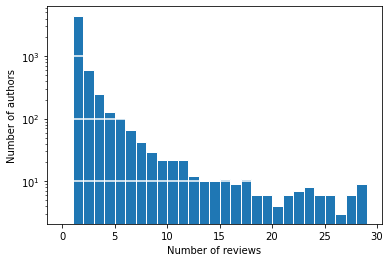

In [7]:
# A histogram is used to plot the distribution of reviews.
# Note pandas contains matplotlib functions already. 
import matplotlib as plt

def histo_details():
    plt.pyplot.xlabel("Number of reviews")
    plt.pyplot.ylabel("Number of authors")
    
#pandas function that uses matplotlib
dfs.groupby('author').title.count().hist(log=True, bins=range(30), edgecolor='white') 

plt.pyplot.grid(False)
plt.pyplot.grid(axis='y', linestyle='-', c='w', linewidth=1.5)  # c is color (American) linewidth = lw , linestyle = ls.
histo_details()

#### Which authors have the most reviews?
The authors were ranked according to the number of reviews.

In [18]:
author_grouped = dfs.groupby('author')
counts_per_author = author_grouped.title.count()
counts_per_author.sort_values(ascending=False).head(10)

author
ur2898520     630
ur4888011     412
ur4248714     404
ur1234929     374
ur4445210     330
ur0989035     316
ur20552756    301
ur2467618     286
ur0482513     272
ur0453068     250
Name: title, dtype: int64

#### Of the authors that have a review count of 100 or more, what is their average rating per movie?

Text(0, 0.5, 'N')

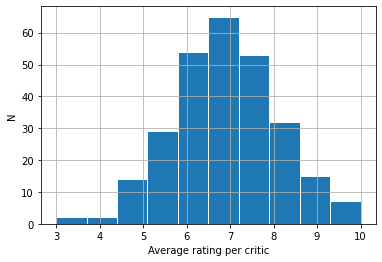

In [28]:
df = dfs.copy()
group = df.groupby('author')
counts = group.title.count() # number of movies reviewed per author.
averages = group.rating.mean() # mean ratings per author

averages[counts>5].hist(bins=10, edgecolor='w', lw=1)


plt.pyplot.xlabel("Average rating per critic")
plt.pyplot.ylabel("N")

This indicates that the movie list given was probably high rated movie. To determine a more accurate average rating per critic. All the ratings made by a critic must be considered. Not just the reviews from the movies selected.

#### For author number 'ur2898520' and 'ur4888011' , Determine whether they like older or newer movies.

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Average Score')

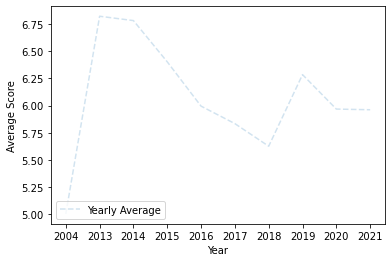

In [9]:
# A plot of date and rating is drawn for each author. 
data = dfs[['date','rating','author']]
data = dfs[dfs.author == 'ur2898520']

data.date = [str(el)[-4:] for el in data.date] #take years only from the date i.e. 19th September 2021

pd.to_numeric(data.date, errors='coerce') 
means = data.groupby('date').mean().dropna() # Note when using groupby.mean, your new columns that are not grouped are means.
# your groupedby becomes the new index

plt.pyplot.plot(means.index, means.rating, '--', label='Yearly Average', alpha=.2)
plt.pyplot.legend(loc='lower left', frameon=True)
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Average Score")

#### A yearly average of ratings given by top critics was plotted.

C:\Users\user\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


Text(0, 0.5, 'Average Score')

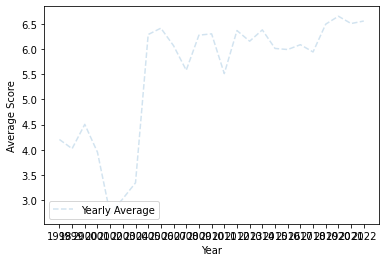

In [8]:
data = dfs[['date','rating']]
data.date = [str(el)[-4:] for el in data.date] #take years only from the date i.e. 19th September 2021

pd.to_numeric(data.date, errors='coerce') 
means = data.groupby('date').mean().dropna() # Note when using groupby.mean, your new columns that are not grouped are means.
# your groupedby becomes the new index


plt.pyplot.plot(means.index, means.rating, '--', label='Yearly Average', alpha=.2)
plt.pyplot.legend(loc='lower left', frameon=True)
plt.pyplot.xlabel("Year")
plt.pyplot.ylabel("Average Score")